#Code to implement a email folder crawler.

The code crawls through three levels of the folders and opens every file inside it.

The number of user folders to open is also customizable.

In [3]:
import pandas as pd
import io as io
import email
import collections
import sys
import os
from os import listdir
from os.path import isfile, join
from pprint import pprint

# Function to extract email body, from and to ids
def parsemessage(raw_email,user):
  lines=raw_email.split('\n')
  # print(lines)
  body=[]
  to_list=[]
  from_list=[]
  keys_to_extract=['to','from']
  email={}
  text=''
  for line in lines:

    # To read body of the email
    if ':' not in line:
      # Some of the emails had this to before the body of the email
      if 'original message' in line.lower():
        body.append(text)
        text=''
        continue
      text+=line.strip()
      
    # To read from and to of the email
    else:
      pairs=line.split(':')
      key=pairs[0].lower()
      val=pairs[1].strip()
      if key in keys_to_extract:
          email[key]=val
          if key=='from':
            from_list.append(val)
          elif key=="to":
            to_list.append(val)

  body.append(text)
  dict = {'body': body, 'from': from_list, 'to': to_list, 'user': user}
  df = pd.DataFrame(dict)
  return dict


# Get directory path from command line
path = "/content/drive/MyDrive/mail_data" + "/"

#To visit only specific folders under each user
# visit_folders = ["inbox","sent","sent_mail","discussion_threads","favorites"]
parent_folders = []
parsed_email_list = []

#Reading only 5 users emails
user_count = 5

# Storing all users names in parent_folders list
for folder in listdir(path):
    parent_folders.append(folder)

# Iterate through files in directory
for user in parent_folders[:user_count]:
    path_check = path + user
    if os.path.isdir(path_check) == False:
        continue
    path2 = path_check+"/"
    for sub_folder in listdir(path2):
        # To only visit specific subfolders 
        # if sub_folder in visit_folders:
        path_check_2 = path2+sub_folder
        if os.path.isdir(path_check_2) == False:
            continue
        path3 = path_check_2+"/"
        for file in listdir(path3):
            path_check_3 = path3+file
            if os.path.isfile(path_check_3):
              # Including try and except blocks 
              try:
                # print(path3)
                mailfile=io.open(path_check_3)
                content=mailfile.read()
                # print(content)
                parsed_email = parsemessage(content,user)
                # print(parsed_email)
                parsed_email_list.append(parsed_email)
              except:
                continue                    
df = pd.DataFrame.from_records(parsed_email_list)

In [4]:
df

,body,from,to,user
0,[Good luck and hope to stay in touch!Utku],[tom.may@enron.com],[harry.arora@enron.com],arora-h
1,"[Files are bigger than the limit, so I am tryi...",[hai.chen@enron.com],[harry.arora@enron.com],arora-h
2,[---Tom HahnExecutive Vice PresidentAPB Energy...,[tom.hahn@apbenergy.com],"[steve.wang@enron.com, robert.stalford@enron.c...",arora-h
3,[Good morning - these are the levels we will b...,[wsandberg3@attbi.com],[wsandberg3@attbi.com],arora-h
4,[],[arsystem@mailman.enron.com],[harry.arora@enron.com],arora-h
...,...,...,...,...
2600,"[mark.guzman@enron.com, leaf.harasin@enron.com...","[bill.williams@enron.com, Williams III, Bill]","[john.anderson@enron.com, todd.bland@enron.com...",williams-w3
2601,[Apparently not.The EPE preschedule sheet had ...,"[bill.williams@enron.com, Symes, Kate, William...","[kate.symes@enron.com, Williams III, Bill, Sym...",williams-w3
2602,[This is from a guy on our floor. He's a summ...,[bill.williams@enron.com],[morganize@yahoo.com],williams-w3
2603,"[leaf.harasin@enron.com, eric.linder@enron.com...","[bill.williams@enron.com, =09Malowney, John =20]","[john.malowney@enron.com, =09Williams III, Bill]",williams-w3


In [5]:
df['body']

0              [Good luck and hope to stay in touch!Utku]
1       [Files are bigger than the limit, so I am tryi...
2       [---Tom HahnExecutive Vice PresidentAPB Energy...
3       [Good morning - these are the levels we will b...
4                                                      []
                              ...                        
2600    [mark.guzman@enron.com, leaf.harasin@enron.com...
2601    [Apparently not.The EPE preschedule sheet had ...
2602    [This is from a guy on our floor.  He's a summ...
2603    [leaf.harasin@enron.com, eric.linder@enron.com...
2604    [Thank you Jill, Dave,You are all set for your...
Name: body, Length: 2605, dtype: object

In [6]:
df['from']

0                                     [tom.may@enron.com]
1                                    [hai.chen@enron.com]
2                                [tom.hahn@apbenergy.com]
3                                  [wsandberg3@attbi.com]
4                            [arsystem@mailman.enron.com]
                              ...                        
2600        [bill.williams@enron.com, Williams III, Bill]
2601    [bill.williams@enron.com, Symes, Kate, William...
2602                            [bill.williams@enron.com]
2603     [bill.williams@enron.com, =09Malowney, John =20]
2604          [bill.williams@enron.com, Chatterton, Jill]
Name: from, Length: 2605, dtype: object

In [7]:
df['to']

0                                 [harry.arora@enron.com]
1                                 [harry.arora@enron.com]
2       [steve.wang@enron.com, robert.stalford@enron.c...
3                                  [wsandberg3@attbi.com]
4                                 [harry.arora@enron.com]
                              ...                        
2600    [john.anderson@enron.com, todd.bland@enron.com...
2601    [kate.symes@enron.com, Williams III, Bill, Sym...
2602                                [morganize@yahoo.com]
2603     [john.malowney@enron.com, =09Williams III, Bill]
2604           [jill.chatterton@enron.com, Poston, David]
Name: to, Length: 2605, dtype: object

# Converting list of body text to single string type text comma separated

In [8]:
df['body'] = [','.join(map(str, l)) for l in df['body']]

In [9]:
df['body'][1]

'Files are bigger than the limit, so I am trying one by one.'

# Convert all words to lower for normalization of data

In [10]:
df['body'] = df['body'].str.lower()

# Removing stop words from the body_string column

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

# removing the word enron as it was repeated in all emails as it is the company name
stop.append('enron')

# Removing all stop words and storing back in body column
df['body'] = df['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['body'][0]

'good luck hope stay touch!utku'

# Removing numbers and other special characters from body

In [13]:
import numpy as np

In [14]:
df['body'] = df['body'].fillna('').astype(str).str.replace(r'[^A-Za-z ]', '', regex=True).replace('', '', regex=False)

In [15]:
df['body'][1]

'files bigger limit trying one one'

# Removing email ids from body of emails
They are treated as stop words

In [16]:
def remove_emailid(line):
  line = line.split()
  new_line = ""
  for word in line:
    if "com" not in word:
      new_line=new_line + word + " "
  return new_line


In [17]:
df['body'] = df['body'].apply(remove_emailid)

In [18]:
df['body'][10]

'htmlheadtitleyahoo bill pay new ebilltitleheadbodyif cant read message usingan email reader supports htmlyou switch textonly version email following go alert edit screen clicking edit icon pencilto right alert name alert edit screen choose text format optionwhich located right email address selection click finished save changestable cellpadding cellspacing bordertrtd widthtdtd valigntop alignrighthr noshade sizetdtrtablebrtable border cellpadding width cellspacingtrtdtable border cellpadding width cellspacingtr bgcolordcdcdctdbfont facearialbill pay alertfontbtdtd valigntop alignrighttdtrtrtd valigntop alignlefttable border cellpadding width cellspacingtrtd valigntop aligncentertable cellpadding border width cellspacingtrtd valigntop bgcolorffffcctdtrtrtdyou received new ebill southwestern bell due janullililiultdtrtabletdtrtabletdtd alignright widthtable border cellpadding cellspacingtrtd alignrighttable border cellpadding cellspacing widthtrtd alignrighttable border cellpadding cell

# Creating text files for different users

In [19]:
for user_name in df.user.unique():
    fileName = user_name +".txt"
    file = open(fileName,"w+") #creating a txt file if not already exists
    
    #adding rows for each unique image name 
    for row in df[df.user==user_name].values:
        file.write(f"{row[0]}")

# Plotting graph by converting categorical into numerical

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2,max_features=200)
X = vect.fit_transform(df['body'])

In [22]:
print(X)

  (0, 68)	1.0
  (3, 25)	0.36251711744633003
  (3, 139)	0.3557477623121634
  (3, 77)	0.2878285151635443
  (3, 161)	0.4079535595776686
  (3, 124)	0.33091168814897853
  (3, 148)	0.3862501813581109
  (3, 181)	0.33133367442767525
  (3, 68)	0.3525333409656824
  (6, 119)	1.0
  (9, 111)	0.04853933923648922
  (9, 101)	0.05553227412487156
  (9, 36)	0.10616907747505588
  (9, 191)	0.05906754984204634
  (9, 149)	0.07901331717521691
  (9, 145)	0.0960488173239843
  (9, 179)	0.04680864019685135
  (9, 189)	0.04985143490227593
  (9, 132)	0.060843467721959296
  (9, 23)	0.12439445864784446
  (9, 195)	0.0576675729834549
  (9, 196)	0.18360261714583487
  (9, 74)	0.11670287511026309
  (9, 175)	0.24037561612032768
  (9, 169)	0.28051504962806567
  :	:
  (2602, 100)	0.5359902733473405
  (2602, 19)	0.1567765993412929
  (2602, 104)	0.14442459596360105
  (2602, 152)	0.1703067323427484
  (2602, 191)	0.17210110579142415
  (2602, 189)	0.14524873801119995
  (2602, 169)	0.2043294091308368
  (2602, 48)	0.1174961673109136

In [23]:
vectorized_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
vectorized_df

,according,accounting,administration,agreement,america,andersen,arthur,asked,assets,attached,...,washington,way,week,white,work,working,year,years,yesterday,york
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
2601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.150270,0.00000,0.0,0.0,0.0,0.0
2602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.172101,0.0,0.0,0.298867,0.00000,0.0,0.0,0.0,0.0
2603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129719,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.12247,0.0,0.0,0.0,0.0


In [25]:
vectorized_df.to_csv('finalexam_small.csv',index=False)

In [26]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df
def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [27]:
features = vect.get_feature_names()
print(top_feats_in_doc(X, features, 0, 20))

      features  score
0         good    1.0
1         york    0.0
2    financial    0.0
3         help    0.0
4        group    0.0
5   government    0.0
6          got    0.0
7        going    0.0
8      general    0.0
9          gas    0.0
10       firms    0.0
11        firm    0.0
12       filed    0.0
13   yesterday    0.0
14     federal    0.0
15      fastow    0.0
16    expected    0.0
17  executives    0.0
18   executive    0.0
19    exchange    0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
def top_mean_feats(X, features,grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()
    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [29]:
print(top_mean_feats(X, features, top_n=10))

    features     score
0      email  0.053811
1       know  0.050684
2        gas  0.048871
3       need  0.043084
4        let  0.040319
5      legal  0.040297
6  agreement  0.035485
7    message  0.032746
8        new  0.032427
9   attached  0.030779


Let me remove all unnecessary columns

In [30]:
df

,body,from,to,user
0,good luck hope stay touchutku,[tom.may@enron.com],[harry.arora@enron.com],arora-h
1,files bigger limit trying one one,[hai.chen@enron.com],[harry.arora@enron.com],arora-h
2,tom hahnexecutive vice presidentapb energychap...,[tom.hahn@apbenergy.com],"[steve.wang@enron.com, robert.stalford@enron.c...",arora-h
3,good morning levels following today uspmiush t...,[wsandberg3@attbi.com],[wsandberg3@attbi.com],arora-h
4,,[arsystem@mailman.enron.com],[harry.arora@enron.com],arora-h
...,...,...,...,...
2600,yesterdays cuts changes colstrip cut procedure...,"[bill.williams@enron.com, Williams III, Bill]","[john.anderson@enron.com, todd.bland@enron.com...",williams-w3
2601,apparently notthe epe preschedule sheet mw len...,"[bill.williams@enron.com, Symes, Kate, William...","[kate.symes@enron.com, Williams III, Bill, Sym...",williams-w3
2602,guy floor hes summer internand tuesday morning...,[bill.williams@enron.com],[morganize@yahoo.com],williams-w3
2603,asked every single counterparty nw sell us ene...,"[bill.williams@enron.com, =09Malowney, John =20]","[john.malowney@enron.com, =09Williams III, Bill]",williams-w3


In [31]:
from sklearn.cluster import KMeans

In [32]:
n_clusters = 3
clf = KMeans(n_clusters=n_clusters, max_iter=100, init='k-means++', n_init=1)
labels = clf.fit_predict(X)

In [33]:
labels

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


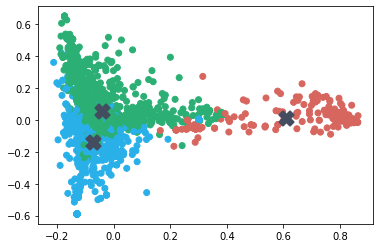

In [35]:
X_dense = X.todense()
pca = PCA(n_components=2).fit(X_dense)
coords = pca.transform(X_dense)

# Lets plot it again, but this time we add some color to it.
# This array needs to be at least the length of the n_clusters.
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC", 
                "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]
colors = [label_colors[i] for i in labels]

plt.scatter(coords[:, 0], coords[:, 1], c=colors)
# Plot the cluster centers
centroids = clf.cluster_centers_
centroid_coords = pca.transform(centroids)
plt.scatter(centroid_coords[:, 0], centroid_coords[:, 1], marker='X', s=200, linewidths=2, c='#444d60')
plt.show()

In [36]:
df

,body,from,to,user
0,good luck hope stay touchutku,[tom.may@enron.com],[harry.arora@enron.com],arora-h
1,files bigger limit trying one one,[hai.chen@enron.com],[harry.arora@enron.com],arora-h
2,tom hahnexecutive vice presidentapb energychap...,[tom.hahn@apbenergy.com],"[steve.wang@enron.com, robert.stalford@enron.c...",arora-h
3,good morning levels following today uspmiush t...,[wsandberg3@attbi.com],[wsandberg3@attbi.com],arora-h
4,,[arsystem@mailman.enron.com],[harry.arora@enron.com],arora-h
...,...,...,...,...
2600,yesterdays cuts changes colstrip cut procedure...,"[bill.williams@enron.com, Williams III, Bill]","[john.anderson@enron.com, todd.bland@enron.com...",williams-w3
2601,apparently notthe epe preschedule sheet mw len...,"[bill.williams@enron.com, Symes, Kate, William...","[kate.symes@enron.com, Williams III, Bill, Sym...",williams-w3
2602,guy floor hes summer internand tuesday morning...,[bill.williams@enron.com],[morganize@yahoo.com],williams-w3
2603,asked every single counterparty nw sell us ene...,"[bill.williams@enron.com, =09Malowney, John =20]","[john.malowney@enron.com, =09Williams III, Bill]",williams-w3


In [37]:
df_1 = df.drop(['from','to'],axis=1)
df_1

,body,user
0,good luck hope stay touchutku,arora-h
1,files bigger limit trying one one,arora-h
2,tom hahnexecutive vice presidentapb energychap...,arora-h
3,good morning levels following today uspmiush t...,arora-h
4,,arora-h
...,...,...
2600,yesterdays cuts changes colstrip cut procedure...,williams-w3
2601,apparently notthe epe preschedule sheet mw len...,williams-w3
2602,guy floor hes summer internand tuesday morning...,williams-w3
2603,asked every single counterparty nw sell us ene...,williams-w3
